In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [4]:
# Features and target
X = data.drop(columns=['DEATH_EVENT'])  # All columns except 'DEATH_EVENT'
y = data['DEATH_EVENT']  # The target column

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Define the model
model = Sequential()

# Input layer
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [8]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
6/6 [==============================] - 4s 255ms/step - loss: 0.7054 - accuracy: 0.4921 - val_loss: 0.6767 - val_accuracy: 0.6250
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6453 - accuracy: 0.6335 - val_loss: 0.6359 - val_accuracy: 0.7292
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6059 - accuracy: 0.7173 - val_loss: 0.6083 - val_accuracy: 0.7500
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.5696 - accuracy: 0.7120 - val_loss: 0.5896 - val_accuracy: 0.7500
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 0.5357 - accuracy: 0.7487 - val_loss: 0.5737 - val_accuracy: 0.7500
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.5009 - accuracy: 0.7906 - val_loss: 0.5601 - val_accuracy: 0.7500
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.4645 - accuracy: 0.8377 - val_loss: 0.5484 - val_accuracy: 0.7500
Epoch 8/100
6/6 [==

In [9]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

2/2 [==============================] - 0s 6ms/step - loss: 0.5843 - accuracy: 0.7167
Test Accuracy: 0.72


In [10]:
# Predict on new data (e.g., X_test)
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

2/2 [==============================] - 0s 5ms/step


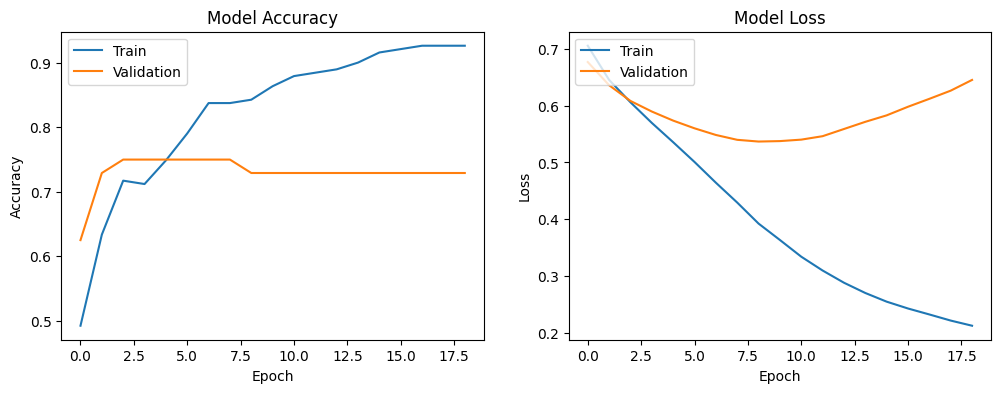

In [13]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()